In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import *   
import cmath  
import functools  
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from matplotlib import rcParams

In [65]:
save = 0 # To save the images 1 to don't save them 0
fs=20

E_lim = 3
props={'linewidth':0,'cmap':'seismic','antialiased':False,
    'rstride':1, 'cstride':1,'vmin':-E_lim, 'vmax':E_lim, "alpha":1}
lprop = {"fontsize":fs}

phi = pi/2
N = 10   #number of bands
t1=1.0   # first nearest neighbour 
t2= 0.03 # second nearest neighbour 
M=0.2    # mass term
resolution = 150




In [66]:
# Definition of Pauli matrix
Pauli_0 = np.array([[1+0j,0],[0,1]])
Pauli_x = np.array([[0j,1],[1,0]])
Pauli_y = np.array([[0,-1j],[1j,0]])
Pauli_z = np.array([[1+0j,0],[0,-1]])


a = [0,0,0]
a[0] = np.array([0, -1])/np.sqrt(3)
a[1] = np.array([np.sqrt(3)/2, 1/2])/np.sqrt(3)
a[2] = np.array([-np.sqrt(3)/2, 1/2])/np.sqrt(3)

v = [0,0,0]
v[0] = np.array([np.sqrt(3), 0])
v[1] = np.array([-np.sqrt(3)/2, 3/2])
v[2] = np.array([-np.sqrt(3)/2, -3/2])
        


def build_H( kx, ky ,**kwargs):
    k = np.array([kx,ky])

    h0 = sum([ np.exp( 1.j * np.dot(k, a[i]) ) for i in range(len(a))])
    h2 = sum(np.sin([np.dot(k,v[i]) for i in range(len(v))]))
    


    H_0 = t1 * np.array([[0,h0],[np.conj(h0),0]])
    H_1 = M * Pauli_z
    H_2 = 2*t2*Pauli_z*h2 


    H = H_0 + H_1+H_2

    return H

In [67]:
list_kx = np.array([])
list_ky = np.array([])
E = np.array([])   #eigenvalue
psi = np.array([]) #eigenvector
kx0 = 0
ky0 = 0
kxx, kyy = np.meshgrid(np.linspace(kx0 - np.pi*2, kx0 + np.pi*2, resolution), np.linspace(ky0 - np.pi*2, ky0 + np.pi*2, resolution))
dkx = kxx[0][1] - kxx[0][0]
dky = kyy[0][1] - kyy[0][0]

for j in range(resolution):
    for i in range(resolution):
        kx = kxx[i][j]
        ky = kyy[i][j]

        E_n_ij, psi_n_ij = np.linalg.eig(build_H(kx, ky) )

        list_kx = np.append(list_kx, kx)
        list_ky = np.append(list_ky, ky)
        E = np.append(E, E_n_ij)
        psi = np.append(psi, psi_n_ij)

E = E.reshape(resolution, resolution, 2)
psi = psi.reshape(resolution, resolution, 2, 2)
# sort data
for i in range(resolution):
    for j in range(resolution):
        sortE = E[i][j].real.argsort()
        E[i][j] = E[i][j][sortE]
        psi[i][j] = psi[i][j][:,sortE]



M : 0.2
t_1 : 1.0
t_2 : 0.03


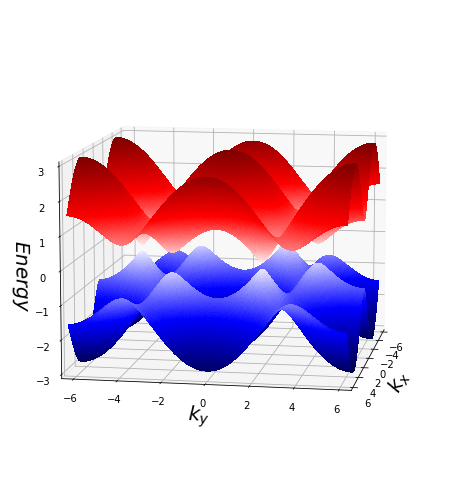

In [70]:


print("M :", M)
print("t_1 :", t1)
print("t_2 :", t2)


num_bands = 2

fig = plt.figure(figsize=(8,8))
ax0 = fig.add_subplot(111, projection='3d')

for dim0 in range(num_bands):
    
    ax0.plot_surface(kxx, kyy, E[:, :, dim0].real, **props, label='parametric curve 2') 
ax0.set_xlim3d(-pi*2,pi*2)
ax0.set_ylim3d(-pi*2,pi*2)
ax0.set_zlim3d(-E_lim,E_lim)
ax0.set_xlabel(r"$k_x$", **lprop)
ax0.set_ylabel(r"$k_y$", **lprop)
ax0.set_zlabel(r"$Energy$", **lprop)



ax0.view_init(elev=10, azim=10)
filename = "Energy dispersion "  + "M =" + str(M) + "_t1=" + str(t1)  + "_t2=" + str(t2)       #"band_3D" +' '+ "M =" + str(M) + "_t1=" + str(t1)  + "_t2=" + str(t2)
plt.title(filename, fontsize=fs*0.75,pad =20, color = 'white')    
if save == 1:
    plt.savefig(filename + ".png", transparent = True, dpi =300)
plt.show()

## Calculating the Berry curvature

In [6]:
def hermite( vec, **kwargs):
        return np.conjugate(vec.T)
    
berry = np.array([])
num_bands = 2

for bnd in range(num_bands):
    for kx in range(1,resolution-1):
        for ky in range(1,resolution-1):
            D = list([0,0,0,0])

            
            D[0] = np.dot(hermite(psi[:,:,:,bnd][ky-1][kx-1]), psi[:,:,:,bnd][ky-1][kx+1])
            D[1] = np.dot(hermite(psi[:,:,:,bnd][ky-1][kx+1]), psi[:,:,:,bnd][ky+1][kx+1])
            D[2] = np.dot(hermite(psi[:,:,:,bnd][ky+1][kx+1]), psi[:,:,:,bnd][ky+1][kx-1])
            D[3] = np.dot(hermite(psi[:,:,:,bnd][ky+1][kx-1]), psi[:,:,:,bnd][ky-1][kx-1])
            berry_ij = -np.log(D[0]*D[1]*D[2]*D[3])/((2*dkx )**2)
            berry = np.append(berry, berry_ij)

berry = berry.reshape(num_bands, resolution-2, resolution-2)
berry = berry.imag   


     

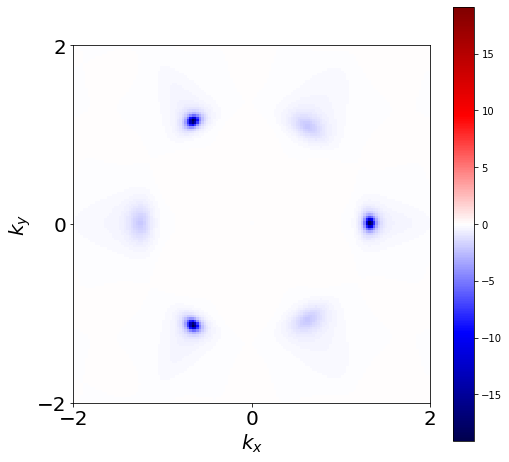

In [7]:
z = berry[0]


zlim = max(abs(z.max()), abs(z.min()))

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)

im = ax.imshow(z,extent=(-2,2,-2,2),interpolation='nearest',cmap='seismic',aspect=1)

ax.set_xticks(np.linspace(-2,2,3))
ax.set_yticks(np.linspace(-2,2,3))

im2 = fig.colorbar(im)
im2.mappable.set_clim(-zlim,zlim)

ax.set_xlabel("$k_x$",**lprop)
ax.set_ylabel("$k_y$",**lprop)
plt.tick_params(labelsize=fs)


filename = " Berry_Curvatur " +"M=" + str(M)  + "_t1=" + str(t1)+" " + "_t2=" + str(t2)
#plt.title(filename, fontsize=0.75*fs, color = 'Black')
if save == 1:
    plt.savefig(filename + ".png",  dpi =300)



plt.show()       

# Calculating the edge states for a strip of graphene

In [91]:
def hamiltonian_edge(k, N, M, t1, t2, phi): 
    h_in = np.zeros((4*N, 4*N))*(1+0j)   
    h_out = np.zeros((4*N, 4*N))*(1+0j)

    
    for i in range(N):
        
        h_in[i*4+0, i*4+0] = M
        h_in[i*4+1, i*4+1] = -M
        h_in[i*4+2, i*4+2] = M
        h_in[i*4+3, i*4+3] = -M

        h_in[i*4+0, i*4+1] = t1
        h_in[i*4+1, i*4+0] = t1
        h_in[i*4+1, i*4+2] = t1
        h_in[i*4+2, i*4+1] = t1
        h_in[i*4+2, i*4+3] = t1
        h_in[i*4+3, i*4+2] = t1

        
        h_in[i*4+0, i*4+2] = t2*cmath.exp(1j*phi)
        h_in[i*4+2, i*4+0] = h_in[i*4+0, i*4+2].conj()
        h_in[i*4+1, i*4+3] = t2*cmath.exp(1j*phi)
        h_in[i*4+3, i*4+1] = h_in[i*4+1, i*4+3].conj()

    for i in range(N-1):
       
        h_in[i*4+3, (i+1)*4+0] = t1
        h_in[(i+1)*4+0, i*4+3] = t1

       
        h_in[i*4+2, (i+1)*4+0] = t2*cmath.exp(-1j*phi)
        h_in[(i+1)*4+0, i*4+2] = h_in[i*4+2, (i+1)*4+0].conj()
        h_in[i*4+3, (i+1)*4+1] = t2*cmath.exp(-1j*phi)
        h_in[(i+1)*4+1, i*4+3] = h_in[i*4+3, (i+1)*4+1].conj()

   
    for i in range(N):
      
        h_out[i*4+1, i*4+0] = t1
        h_out[i*4+2, i*4+3] = t1

      
        h_out[i*4+0, i*4+0] = t2*cmath.exp(-1j*phi)
        h_out[i*4+1, i*4+1] = t2*cmath.exp(1j*phi)
        h_out[i*4+2, i*4+2] = t2*cmath.exp(-1j*phi)
        h_out[i*4+3, i*4+3] = t2*cmath.exp(1j*phi)

        h_out[i*4+1, i*4+3] = t2*cmath.exp(-1j*phi)
        h_out[i*4+2, i*4+0] = t2*cmath.exp(1j*phi)
        if i != 0:
            h_out[i*4+1, (i-1)*4+3] = t2*cmath.exp(-1j*phi)
    for i in range(N-1):
        h_out[i*4+2, (i+1)*4+0] = t2*cmath.exp(1j*phi)

    matrix = h_in + h_out*cmath.exp(-1j*k) + h_out.transpose().conj()*cmath.exp(1j*k)
    return matrix

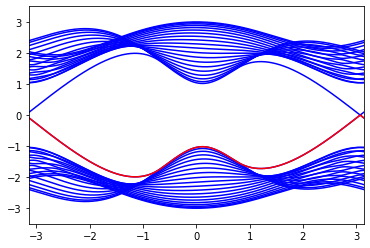

In [92]:

k = np.linspace(-2*pi, 2*pi, 800)
t1 =1
M=0.2
t2=0.5
N=10
save = 1
phi = pi/2

segments_x = np.r_[x[0], x[1:-1].repeat(2), x[-1]].reshape(-1, 2)

dim = 4*N
dim_k = k.shape[0]
eigenvalue_k = np.zeros((dim_k, dim)) 
i0 = 0
for k0 in k:
    matrix0 = hamiltonian_edge(k0,N,M, t1, t2, phi)
    eigenvalue, eigenvector = np.linalg.eig(matrix0)
    eigenvalue_k[i0, :] = np.sort(np.real(eigenvalue[:]))
    i0 += 1
    
for dim0 in range(dim):
    
    plt.plot(k, eigenvalue_k[:, dim0], '-b')  # -.
    plt.ylim((-3.5,3.5))
    plt.xlim((-np.pi,np.pi))
plt.plot(k, eigenvalue_k[:, 19], '-r')    
filename = "Test Zig-Zag_T =" +"M=" + str(M) + "_t1=" + str(t1) + "_t2=" + str(t2)
if save == 1:
    plt.savefig(filename + ".png",  transparent = True, dpi =600)
plt.show()